In [16]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('./temperature.csv',index_col='Date',parse_dates=True)
df=df.dropna()
df.index.freq="D"
print('Shape of data', df.shape)
df.head()

Shape of data (8292, 6)


,PS,QV2M,AVG_TS,T2M_RANGE,T2M_MAX,T2M_MIN
Date,,,,,,
2000-01-01,87.67,2.32,7.41,11.30,18.80,7.49
2000-01-02,87.63,2.38,8.07,11.36,20.19,8.83
2000-01-03,87.50,2.32,7.77,10.91,19.48,8.57
2000-01-04,87.48,2.32,7.77,12.27,19.65,7.38
2000-01-05,87.54,2.20,7.90,12.14,19.87,7.73


<AxesSubplot:xlabel='Date'>

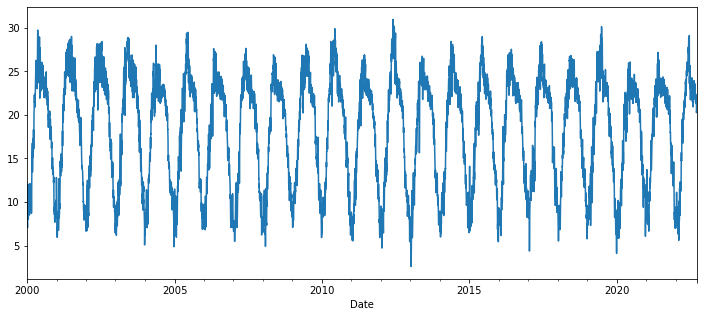

In [19]:
#PLOTTING
df['AVG_TS'].plot(figsize=(12,5))

In [20]:
#Check for stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [21]:
adf_test(df['AVG_TS'])

1. ADF :  -9.645293628499696
2. P-Value :  1.4834149496886552e-16
3. Num Of Lags :  37
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 8254
5. Critical Values :
	 1% :  -3.4311425048275463
	 5% :  -2.861890231833187
	 10% :  -2.5669564235909674


In [22]:


from pmdarima import auto_arima
#ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

In [7]:
#figure out order for ARIMA model
stepwise_fit = auto_arima(df['AVG_TS'],trace=True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20805.413, Time=20.83 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=54116.140, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=44045.005, Time=1.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=72681.432, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=20903.256, Time=5.71 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=20986.273, Time=5.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=20797.492, Time=21.76 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=20798.674, Time=17.39 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=20802.078, Time=18.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=20809.412, Time=22.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=20803.827, Time=21.02 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=20799.316, Time=23.28 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=20798.904, Time=32.85 sec
 ARIMA(3,0,2)(0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8292
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -10391.746
Date:                Wed, 02 Nov 2022   AIC                          20797.492
Time:                        08:33:44   BIC                          20846.653
Sample:                    01-01-2000   HQIC                         20814.289
                         - 09-13-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0317      0.008      3.786      0.000       0.015       0.048
ar.L1          1.9042      0.074     25.599      0.000       1.758       2.050
ar.L2         -1.2022      0.136     -8.820      0.000      -1.469      -0.935
ar.L3          0.2962      0.065      4.536      0.000       0.168       0.424
ma.L1         -0.9041      0.076    -11.869      0.000      -1.053      -0.755
ma.L2          0.1777      0.071      2.496      0.013       0.038       0.317
sigma2         0.7175      0.008     85.494      0.000       0.701       0.734
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1523.76
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.34
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from statsmodels.tsa.arima_model import ARIMA

(8292, 6)
(7927, 6) (365, 6)
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=19974.121, Time=13.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=51744.482, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=42121.853, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=69489.516, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=20070.770, Time=6.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=20152.467, Time=7.58 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=19965.905, Time=16.69 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=19967.223, Time=10.84 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=19970.398, Time=16.86 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=19978.095, Time=18.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=19972.313, Time=19.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=19967.689, Time=20.63 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=19968.448, Tim

<AxesSubplot:xlabel='Date'>

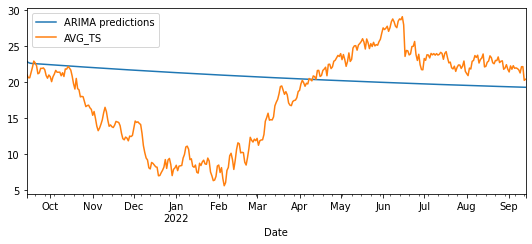

In [72]:
# split data into training and testing

print(df.shape)
train=df.iloc[:-365]
test=df.iloc[-365:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

#train the model
# from statsmodels.tsa.arima_model import ARIMA

import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['AVG_TS'],order=(3,0,2)) 
model = model.fit()
#make predictions on test set

start= len(train)
end = len(train)+len(test) - 1
index_future_dates=pd.date_range(start='2021-09-14',end='2022-09-13')
pred_train = model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred_train.index=index_future_dates
pred_train.plot(legend=True)
test['AVG_TS'].plot(legend=True)





In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['AVG_TS'],pred_train))
print("RMSE error is: ",rmse)


# r2 score
from sklearn.metrics import r2_score
r2score0 = r2_score(test['AVG_TS'],pred_train)
print("R2 score is: ",r2score0)


RMSE error is:  7.248809238009351
R2 score is:  -0.35405137577854173


2022-09-13    20.531286
2022-09-14    20.667941
2022-09-15    20.756293
2022-09-16    20.782302
2022-09-17    20.761073
2022-09-18    20.716621
2022-09-19    20.668871
2022-09-20    20.628753
2022-09-21    20.598968
2022-09-22    20.577255
2022-09-23    20.559726
2022-09-24    20.543064
2022-09-25    20.525397
2022-09-26    20.506212
2022-09-27    20.485843
2022-09-28    20.464918
2022-09-29    20.443984
2022-09-30    20.423363
2022-10-01    20.403146
2022-10-02    20.383286
2022-10-03    20.363680
2022-10-04    20.344235
2022-10-05    20.324897
2022-10-06    20.305646
2022-10-07    20.286490
2022-10-08    20.267443
2022-10-09    20.248519
2022-10-10    20.229728
2022-10-11    20.211071
2022-10-12    20.192546
2022-10-13    20.174150
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

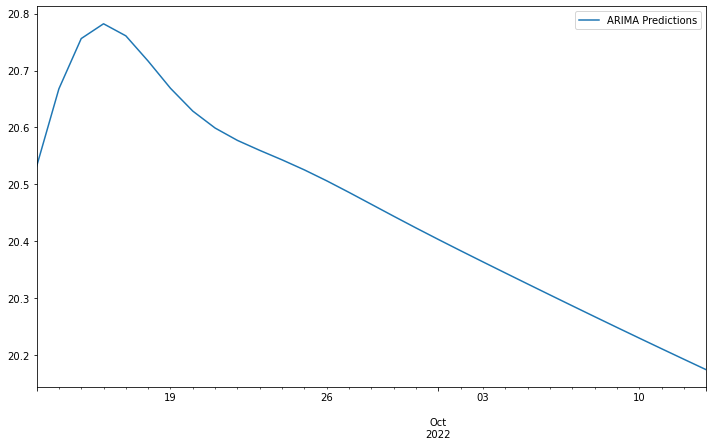

In [27]:
model2 = sm.tsa.arima.ARIMA(df['AVG_TS'],order=(3,0,2))
model2 = model2.fit()
df.tail()

#for future
index_future_dates=pd.date_range(start='2022-09-13',end='2022-10-13')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)
pred.plot(figsize=(12,7),legend=True)


Error in 1 days time series gap : 3.0323783781254288
R2 score for 1 day gap is:  0.7624819054374384


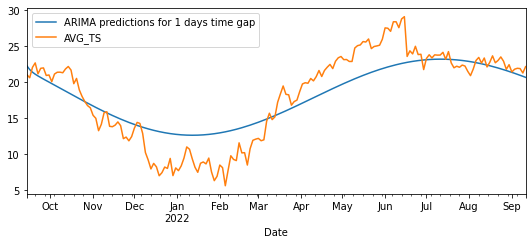

In [66]:
#1 days gap
df1=df.iloc[:-365:2]

# figure out order for ARIMA model
# stepwise_fit1 = auto_arima(df1['AVG_TS'],trace=True, suppress_warnings = True)
# stepwise_fit1.summary()

train1=df1
test1 = df.iloc[-365:]
test1.head()

train1=df1
test1 = test1.iloc[:-1:2]


#train the model
# from statsmodels.tsa.arima_model import ARIMA

model1 = sm.tsa.arima.ARIMA(train1['AVG_TS'],order=(3,0,2)) 
model1 = model1.fit()
#make predictions on test set

start= len(train1)
end = len(train1)+len(test1) - 1
index_future_dates=pd.date_range(start='2021-09-14',end='2022-09-12',freq="2D")
pred_train1 = model1.predict(start=start,end=end,typ='levels').rename('ARIMA predictions for 1 days time gap')
pred_train1.index=index_future_dates

pred_train1.plot(legend=True)
test1['AVG_TS'].plot(legend=True)

rmse1=sqrt(mean_squared_error(test1['AVG_TS'],pred_train1))
print("Error in 1 days time series gap : " + str(rmse1))

from sklearn.metrics import r2_score
r2score1 = r2_score(test1['AVG_TS'],pred_train1)
print("R2 score for 1 day gap is: ",r2score1)




(1322, 6)
Error in 5 days time series gap : 2.9308235169747747
R2 score for 5 day gap is:  0.7734954406453393


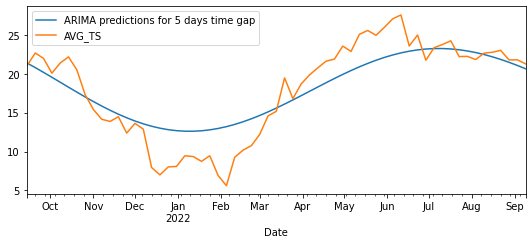

In [62]:
#In different time series

#5 days gap
df5=df.iloc[:-365:6]
df5.tail()
print(df5.shape)

# figure out order for ARIMA model
#stepwise_fit5 = auto_arima(df5['AVG_TS'],trace=True, suppress_warnings = True)
#stepwise_fit5.summary()

test5 = df.iloc[-365:]
test5.head()

train5=df5
test5 = test5.iloc[:-1:6]


#train the model
# from statsmodels.tsa.arima_model import ARIMA

model5 = sm.tsa.arima.ARIMA(train5['AVG_TS'],order=(2,0,2)) 
model5 = model5.fit()
#make predictions on test set

start= len(train5)
end = len(train5)+len(test5) - 1
index_future_dates=pd.date_range(start='2021-09-14',end='2022-09-13',freq="6D")
pred_train5 = model5.predict(start=start,end=end,typ='levels').rename('ARIMA predictions for 5 days time gap')
pred_train5.index=index_future_dates
pred_train5.plot(legend=True)
test5['AVG_TS'].plot(legend=True)

rmse5=sqrt(mean_squared_error(test5['AVG_TS'],pred_train5))
print("Error in 5 days time series gap : " + str(rmse5))

from sklearn.metrics import r2_score
r2score5 = r2_score(test5['AVG_TS'],pred_train5)
print("R2 score for 5 day gap is: ",r2score5)



(529, 6)
(529, 6)
Error in 14 days time series gap : 3.0992984563822943
R2 score for 14 day gap is:  0.7483009544571934


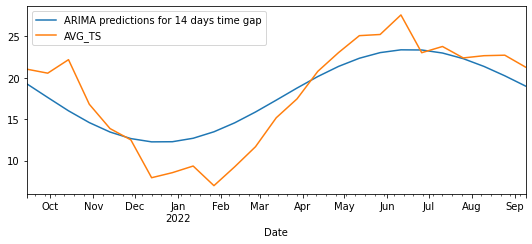

In [63]:
#14 days gap
df14=df.iloc[:-365:15]
print(df14.shape)

#figure out order for ARIMA model
#stepwise_fit14 = auto_arima(df14['AVG_TS'],trace=True, suppress_warnings = True)
#stepwise_fit14.summary()


train14=df14

print(train14.shape)
test14 = df.iloc[-365:]
test14.head()

test14 = test14.iloc[:-1:15]


#train the model
# from statsmodels.tsa.arima_model import ARIMA

model14 = sm.tsa.arima.ARIMA(train14['AVG_TS'],order=(4,0,1)) 
model14 = model14.fit()
#make predictions on test set

start= len(train14)
end = len(train14)+len(test14) - 1
index_future_dates=pd.date_range(start='2021-09-14',end='2022-09-13',freq="15D")
pred_train14 = model14.predict(start=start,end=end,typ='levels').rename('ARIMA predictions for 14 days time gap')
pred_train14.index=index_future_dates
#print(pred_train7)
pred_train14.plot(legend=True)
test14['AVG_TS'].plot(legend=True)

rmse14=sqrt(mean_squared_error(test14['AVG_TS'],pred_train14))
print("Error in 14 days time series gap : " + str(rmse14))

r2score14 = r2_score(test14['AVG_TS'],pred_train14)
print("R2 score for 14 day gap is: ",r2score14)

(256, 6)
(256, 6)
Error in 30 days time series gap : 3.4093393793477307
R2 score for 30 day gap is:  0.6813129664059174


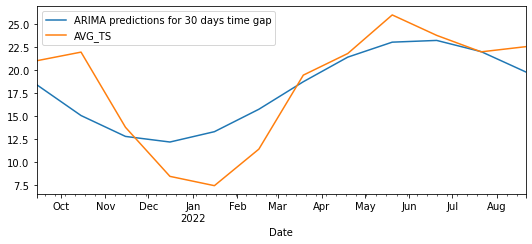

In [67]:
#30 days gap
df30=df.iloc[:-365:31]
print(df30.shape)

#figure out order for ARIMA model
# stepwise_fit30 = auto_arima(df30['AVG_TS'],trace=True, suppress_warnings = True)
# stepwise_fit30.summary()


train30=df30

print(train30.shape)


test30 = df.iloc[-365:]
test30.head()

test30 = test30.iloc[:-1:31]


#train the model
# from statsmodels.tsa.arima_model import ARIMA

model30 = sm.tsa.arima.ARIMA(train30['AVG_TS'],order=(2,0,2)) 
model30 = model30.fit()
#make predictions on test set

start= len(train30)
end = len(train30)+len(test30) - 1
index_future_dates=pd.date_range(start='2021-09-14',end='2022-09-5',freq="31D")
pred_train30 = model30.predict(start=start,end=end,typ='levels').rename('ARIMA predictions for 30 days time gap')
pred_train30.index=index_future_dates
#print(pred_train7)
pred_train30.plot(legend=True)
test30['AVG_TS'].plot(legend=True)

rmse30=sqrt(mean_squared_error(test30['AVG_TS'],pred_train30))
print("Error in 30 days time series gap : " + str(rmse30))

r2score30 = r2_score(test30['AVG_TS'],pred_train30)
print("R2 score for 30 day gap is: ",r2score30)

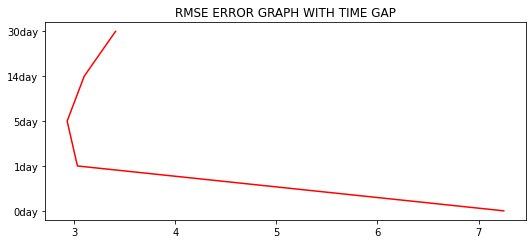

In [76]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = [rmse,rmse1,rmse5,rmse14,rmse30]
y = ["0day","1day","5day","14day","30day"]

plt.title("RMSE ERROR GRAPH WITH TIME GAP")
plt.plot(x, y, color="red")

plt.show()

